# 데이터 불러오기

In [2]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
import os, re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import requests
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import os
import tensorflow as tf
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.88.118.66:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.88.118.66:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
!git clone https://github.com/sunnysai12345/News_Summary.git

Cloning into 'News_Summary'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [4]:
import pandas as pd
data = pd.read_csv('/content/News_Summary/news_summary_more.csv', encoding='iso-8859-1')
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
data['headlines'] = data.headlines.apply(lambda x: x.encode('latin1').decode('utf-8'))

In [6]:
data.headlines.sample(10)

35927    Chrome, Firefox to support voice, facial authe...
82173    Referees attacked after drawn match in Chinese...
13855    Startup co-working space provider Innov8 raise...
28347    PM Modi's govt using surgical strikes to win v...
24750    Sensex closes above 36,700 for first time afte...
13847    Saudi Prince Alwaleed's wealth falls to 6-yr-l...
75876    China online game firm billionaire loses â¹11...
91756    Give Lipstick Under My Burkha 'A' certificate:...
33873    Mamata didi should get her brain examined: Tri...
58884    What were PM Modi, Ivanka served for dinner in...
Name: headlines, dtype: object

# 데이터 전처리

In [7]:
print("중복제거시 헤드라인 숫자 ",data.headlines.nunique())
print("중복제거시 본문 숫자 ", data.text.nunique())

중복제거시 헤드라인 숫자  98280
중복제거시 본문 숫자  98360


In [8]:
droped = data.drop_duplicates()

In [9]:
# 중복 제거 숫자
print(droped.headlines.shape,droped.text.shape)

(98379,) (98379,)


In [10]:
# Null 체크
droped.isnull().sum()

headlines    0
text         0
dtype: int64

In [11]:
droped.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
droped.shape

(98379, 2)

## contractions 예제

In [13]:
!pip install contractions

     |████████████████████████████████| 284 kB 5.3 MB/s 
     |████████████████████████████████| 321 kB 80.5 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=463425ddba940084356bfb5905d2883570d427676ab247166e39f1fd7029b064
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [14]:
# import library
import contractions
# contracted text
text = '''I'll be there within 5 min. Shouldn't you be there too? 
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
  
# creating an empty list
expanded_words = []    
for word in text.split():
  # using contractions.fix to expand the shotened words
  expanded_words.append(contractions.fix(word))   
    
expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)

Original text: I'll be there within 5 min. Shouldn't you be there too? 
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.
Expanded_text: I will be there within 5 min. Should not you be there too? I would love to see you there my dear. It is awesome to meet new friends. We have been waiting for this day for so long.


In [15]:
def preprocess_sentence(sentence):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text
    sentence = re.sub(r'\([^)]*\)','', sentence) # 괄호로 닫힌 문자열 제거
    sentence = re.sub('"','',sentence)
    sentence = ' '.join([contractions.fix(word) for word in sentence.split(" ")])
    #sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거, Ex) roland`s -> roland
    sentence = re.sub("[^a-zA-Z]"," ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmm yeah -> umm yeah
    sentence = re.sub('[ ]{2,}', ' ', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmm yeah -> umm yeah
    
    return sentence

def remove_stopwords(sentence):
    tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    return tokens

### 본문 전처리

In [16]:
data['processed'] =  data.text.apply(preprocess_sentence)
data.processed[0]

'saurav kant an alumnus of upgrad and iiit b pg program in machine learning and artificial intelligence was a sr systems engineer at infosys with almost years of work experience the program and upgrad degree career support helped him transition to a data scientist at tech mahindra with salary hike upgrad online power learning has powered lakh careers '

본문 불용어

In [17]:
data['processed'] = data.text.apply(remove_stopwords)
data.processed[0]

"Saurav Kant, alumnus upGrad IIIT-B's PG Program Machine learning Artificial Intelligence, Sr Systems Engineer Infosys almost years work experience. The program upGrad's 360-degree career support helped transition Data Scientist Tech Mahindra 90% salary hike. upGrad's Online Power Learning powered lakh+ careers."

### 헤드라인 전처리

In [18]:
data['headlines'] = data.headlines.apply(preprocess_sentence)
data.headlines[0]

'upgrad learner switches to career in ml al with salary hike'

### 데이터 프레임 공백, null 제거

In [19]:
data.replace('', np.nan, inplace=True)

In [20]:
#null 확인
data.isnull().sum()

headlines    0
text         0
processed    0
dtype: int64

In [21]:
#Null값 제거
data.dropna(axis=0, inplace=True)
print("전체 데이터 수: ", len(data))

전체 데이터 수:  98401


## 데이터셋 분석

텍스트 최소 길이 : 1
텍스트 최대 길이 : 91
텍스트 평균 길이 : 58.2385341612382
요약 최소 길이 : 1
요약 최대 길이 : 17
요약 평균 길이 : 9.486570258432334


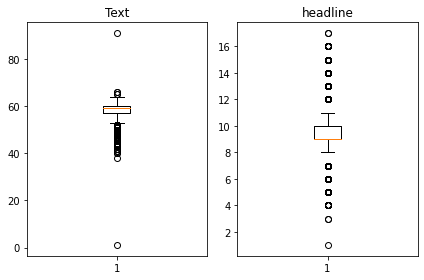

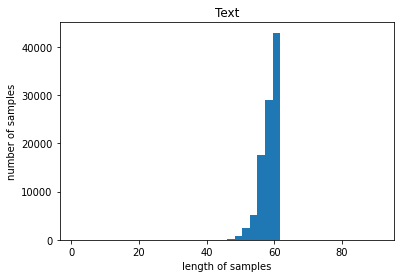

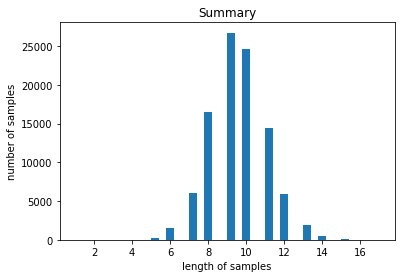

In [22]:
import matplotlib.pyplot as plt
data['text_len'] = data.text.apply(lambda x: len(x.split()))
data['headline_len'] = data.headlines.apply(lambda x: len(x.split()))

print(f'텍스트 최소 길이 : {np.min(data.text_len)}')
print(f'텍스트 최대 길이 : {np.max(data.text_len)}')
print(f'텍스트 평균 길이 : {np.mean(data.text_len)}')
print(f'요약 최소 길이 : {np.min(data.headline_len)}')
print(f'요약 최대 길이 : {np.max(data.headline_len)}')
print(f'요약 평균 길이 : {np.mean(data.headline_len)}')

plt.subplot(1,2,1)
plt.boxplot(data.text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(data.headline_len)
plt.title('headline')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(data.text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(data.headline_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
# 최대 길이 정의 데이터 포함하기 위해 임의 숫자 추가
text_max_len = int(data.text_len.mean()) + 10
headline_max_len = int(data.headline_len.mean()) + 5
print(f"본문 최대 길이 {text_max_len}, 헤드라인 최대길이 {headline_max_len}")

본문 최대 길이 68, 헤드라인 최대길이 14


In [24]:
# 데이터 비율
print(data.text_len[data.text_len <= text_max_len].shape[0] / len(data.text_len))
print(data.headline_len[data.headline_len <= headline_max_len].shape[0] / len(data.headline_len))

0.9999898375016514
0.9990040751618378


In [25]:
under_max_df = data[data.headline_len <= headline_max_len]

In [26]:
# max 이하 데이터
len(under_max_df)

98303

In [27]:
# 토큰 붙이기 start, end
under_max_df['decoder_input'] = under_max_df.headlines.apply(lambda x: '<sostoken> ' + x)
under_max_df['decoder_output'] = under_max_df.text.apply(lambda x: x + ' <endtoken>')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
under_max_df.decoder_output[0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers. <endtoken>"

In [29]:
# 데이터 numpy array로 정의
encoder_input = under_max_df.text.to_numpy()
decoder_input = under_max_df.decoder_input.to_numpy()
decoder_output = under_max_df.decoder_output.to_numpy()

In [30]:
# 셔플을 위한 int array
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[95019  1822 18429 ... 14458 57020 86855]


In [31]:
# int 시퀸스를 활용한 샘플 순서 shuffle
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_output = decoder_output[indices]

## 데이터 분리

In [32]:
# 데이터셋 20% 분리
test_n = int(len(encoder_input)*0.2)
print("test 셋: ",test_n)
print("train 셋: ", len(encoder_input)-test_n)

test 셋:  19660
train 셋:  78643


In [33]:
encoder_input_train = encoder_input[test_n:]
decoder_input_train = decoder_input[test_n:]
decoder_output_train = decoder_output[test_n:]

encoder_input_test = encoder_input[:test_n]
decoder_input_test = decoder_input[:test_n]
decoder_output_test = decoder_output[:test_n]

print(f"훈련 데이터 수 : {len(encoder_input_train)}")
print(f"훈련 레이블 수 : {len(decoder_input_train)}")
print(f"테스트 데이터 수 : {len(encoder_input_test)}")
print(f"테스트 레이블 수 : {len(decoder_input_test)}")

훈련 데이터 수 : 78643
훈련 레이블 수 : 78643
테스트 데이터 수 : 19660
테스트 레이블 수 : 19660


### 정수로 인코딩

#### 본문 데이터

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(encoder_input_train)

In [35]:
threshold = 4
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key,value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print(f"단어 집합(vocab) 크기 : {total_cnt}")
print(f"등장 빈도가 {threshold-1}번 이하인 희귀 단어 수{rare_cnt}")
print(f"단어 집합에서 희귀 단어 제외 후 단어 집합 크기 {total_cnt - rare_cnt}")
print(f"단어 집합에서 희귀 단어 비율: {(rare_cnt / total_cnt)*100}")
print(f"전체 등장 빈도에서 희귀 단어 등장 빈도 비율: {(rare_freq / total_freq)*100}")

단어 집합(vocab) 크기 : 91103
등장 빈도가 3번 이하인 희귀 단어 수57105
단어 집합에서 희귀 단어 제외 후 단어 집합 크기 33998
단어 집합에서 희귀 단어 비율: 62.681799721194686
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.77951820442365


In [36]:
vocab = total_cnt - rare_cnt
tokenizer = Tokenizer(num_words=vocab)
tokenizer.fit_on_texts(encoder_input_train)

In [37]:
# 텍스트에서 정수 시퀸스
encoder_input_train = tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = tokenizer.texts_to_sequences(encoder_input_test)

#### headline 데이터

In [38]:
target_tokenizer = Tokenizer()
target_tokenizer.fit_on_texts(decoder_input_train)

In [39]:
threshold = 2
total_cnt = len(target_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 빈도수가 threshold보다 작은 단어 수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # 빈도수가 threshold보다 작은 단어의 등장 빈도수 총합

for key, value in target_tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30185
등장 빈도가 1번 이하인 희귀 단어의 수: 10688
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19497
단어 집합에서 희귀 단어의 비율: 35.40831538843797
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2967978024324665


In [40]:
target_vocab = total_cnt - rare_cnt
target_tokenizer = Tokenizer(num_words=target_vocab)
target_tokenizer.fit_on_texts(decoder_input_train)
target_tokenizer.fit_on_texts(decoder_output_train)

# 텍스트에서 정수 시퀸스로
decoder_input_train = target_tokenizer.texts_to_sequences(decoder_input_train)
decoder_output_train = target_tokenizer.texts_to_sequences(decoder_output_train)
decoder_input_test = target_tokenizer.texts_to_sequences(decoder_input_test)
decoder_output_test = target_tokenizer.texts_to_sequences(decoder_output_test)

In [41]:
# 전처리 이후 비어버린 요약문 처리
drop_train = [index for index,sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]
print(f"삭제할 훈련 데이터 수 : {len(drop_train)}")
print(f"삭제할 테스트 데이터 수 : {len(drop_test)}")

삭제할 훈련 데이터 수 : 0
삭제할 테스트 데이터 수 : 0


### 패딩

In [42]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headline_max_len, padding='post')
decoder_output_train = pad_sequences(decoder_output_train, maxlen=headline_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headline_max_len, padding='post')
decoder_output_test = pad_sequences(decoder_output_test, maxlen=headline_max_len, padding='post')

### 전처리 저장

In [45]:
np.save("/content/drive/MyDrive/[E-08]/encoder_input_train",encoder_input_train)
np.save("/content/drive/MyDrive/[E-08]/encoder_input_test",encoder_input_test)
np.save("/content/drive/MyDrive/[E-08]/decoder_input_train",decoder_input_train)
np.save("/content/drive/MyDrive/[E-08]/decoder_output_train",decoder_output_train)
np.save("/content/drive/MyDrive/[E-08]/decoder_input_test",decoder_input_test)
np.save("/content/drive/MyDrive/[E-08]/decoder_output_test",decoder_output_test)

In [ ]:
encoder_input_train = np.load("/content/drive/MyDrive/[E-08]/encoder_input_train.npy")
encoder_input_test = np.load("/content/drive/MyDrive/[E-08]/encoder_input_test.npy")
decoder_input_train = np.load("/content/drive/MyDrive/[E-08]/decoder_input_train.npy")
decoder_output_train = np.load("/content/drive/MyDrive/[E-08]/decoder_output_train.npy")
decoder_input_test = np.load("/content/drive/MyDrive/[E-08]/decoder_input_test.npy")
decoder_output_test = np.load("/content/drive/MyDrive/[E-08]/decoder_output_test.npy")

In [46]:
data.to_csv('/content/drive/MyDrive/[E-08]/preprocessed_news.csv')

# 모델 설계

In [47]:
from tensorflow import keras
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
embedding_dim = 128
hidden_size = 256

## 인코더 설계

In [ ]:
# #인코더
# encoder_inputs = Input(shape=(text_max_len,))
# #임베딩
# encoder_embed = Embedding(vocab, embedding_dim)(encoder_inputs)
# # 인코더 LSTM1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
# encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embed)
# # 인코더 LSTM2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
# encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
# # 인코더 LSTM3
# encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
# encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

## 디코더 설계

In [ ]:
# decoder_inputs = Input(shape=(None,))
# # 디코더 임베딩
# decoder_embed = Embedding(target_vocab, embedding_dim)
# decoder_embed = decoder_embed(decoder_inputs)

# # 디코더 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
# decoder_outputs, _, _ = decoder_lstm(decoder_embed, initial_state=[state_h, state_c])

# # 디코더 출력
# decoder_softmax_layer = Dense(target_vocab, activation='softmax')
# decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)

In [ ]:
# model = Model([encoder_inputs,decoder_inputs],decoder_softmax_outputs)
# model.summary()

In [ ]:
# from tensorflow.keras.layers import AdditiveAttention
# #어텐션 층
# attention_layer = AdditiveAttention(name='attention_layer')
# # 인코더, 디코더 모든 time step hidden state 어텐션 층에 전달하고 결과 리턴
# attention_out = attention_layer([decoder_outputs, encoder_outputs])

# # 어텐션 결과와 디코더 hidden state 연결
# decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_out])

# # 디코더 출력층
# decoder_softmax_layer = Dense(target_vocab, activation='softmax')
# decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# #모델 정의
# model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
# model.summary()

In [48]:
import tensorflow as tf
EPOCH = 200
BATCH_SIZE = 256
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [49]:
with strategy.scope():
    encoder_inputs = Input(shape=(text_max_len,))
    encoder_embed = Embedding(vocab, embedding_dim)(encoder_inputs)
    encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embed)
    encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
    encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)
    decoder_inputs = Input(shape=(None,))
    decoder_embed_layer = Embedding(target_vocab, embedding_dim)
    decoder_embed = decoder_embed_layer(decoder_inputs)
    decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
    decoder_outputs, _, _ = decoder_lstm(decoder_embed, initial_state=[state_h, state_c])
    decoder_softmax_layer = Dense(target_vocab, activation='softmax')
    decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs)
    from tensorflow.keras.layers import AdditiveAttention
    attention_layer = AdditiveAttention(name='attention_layer')
    attention_out = attention_layer([decoder_outputs, encoder_outputs])
    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_out])
    decoder_softmax_layer = Dense(target_vocab, activation='softmax')
    decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)
    model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
    history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_output_train,
                   validation_data=([encoder_input_test, decoder_input_test], decoder_output_test),
                   batch_size=BATCH_SIZE, callbacks=[early_stop], epochs=EPOCH)

Epoch 1/200
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


308/308 [==============================] - 73s 150ms/step - loss: 7.4359 - accuracy: 0.1072 - val_loss: 6.8213 - val_accuracy: 0.1283
Epoch 2/200
308/308 [==============================] - 24s 78ms/step - loss: 6.7727 - accuracy: 0.1267 - val_loss: 6.7592 - val_accuracy: 0.1284
Epoch 3/200
308/308 [==============================] - 24s 79ms/step - loss: 6.7215 - accuracy: 0.1277 - val_loss: 6.7207 - val_accuracy: 0.1285
Epoch 4/200
308/308 [==============================] - 24s 78ms/step - loss: 6.6958 - accuracy: 0.1280 - val_loss: 6.6963 - val_accuracy: 0.1304
Epoch 5/200
308/308 [==============================] - 24s 78ms/step - loss: 6.6800 - accuracy: 0.1296 - val_loss: 6.6922 - val_accuracy: 0.1298
Epoch 6/200
308/308 [==============================] - 24s 78ms/step - loss: 6.6696 - accuracy: 0.1307 - val_loss: 6.6804 - val_accuracy: 0.1314
Epoch 7/200
308/308 [==============================] - 24s 78ms/step - loss: 6.6617 - accuracy: 0.1309 - val_loss: 6.6765 - val_accuracy: 0.1

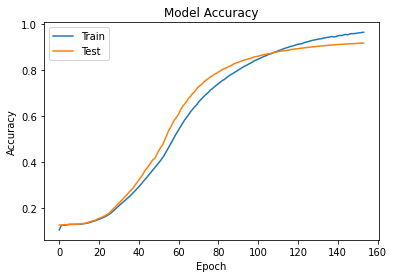

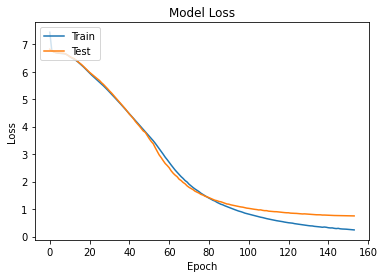

In [52]:
# 훈련 과정 정확도
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

추가훈련

model save

In [53]:
model.save_weights("/content/drive/MyDrive/[E-08]/model_weight1.h5")

## 인퍼런스, 단어 시퀸스 완성

In [54]:
# 정수 행렬을 텍스트 데이터로
index_to_word = tokenizer.index_word
target_word_to_index = target_tokenizer.word_index
target_index_to_word = target_tokenizer.index_word

In [55]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = decoder_embed_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


In [56]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attention_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [57]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = target_index_to_word[sampled_token_index]

        if (sampled_token!='endtoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'endtoken'  or len(decoded_sentence.split()) >= (headline_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=target_word_to_index['sostoken']) and i!=target_word_to_index['endtoken']):
            temp = temp + target_index_to_word[i] + ' '
    return temp

In [58]:
for i in range(20, 40):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : karnataka's urban land transport directorate has proposed the introduction of 4 000 gps equipped public sharing bicycles at a cost of about ã¢ââ¹60 crore in bengaluru it also proposed setting up 350 points including four at metro stations for the bicycles this comes after chief minister siddaramaiah proposed the idea of a bicycle sharing system in his budget speech 
실제 요약 : bengaluru may get public sharing bicycles with gps 
예측 요약 :  siddaramaiah proposed the idea of a green sharing system in his budget speech


원문 : slamming the brahmin group sarv brahmin mahasabha which claimed the film 'manikarnika' defamed rani laxmibai kangana ranaut said we cannot even think like that the kind of things they are saying what they are saying is actually defaming earlier the group had alleged that the film features a romantic scene between rani laxmibai and a british east india company agent 
실제 요약 : brahmin group is defaming rani laxmibai s memory kangana 
예측 요약 :  a romantic scene between ra

In [59]:
!pip install summa

     |████████████████████████████████| 54 kB 2.1 MB/s 
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54412 sha256=ce26aa4b90193df836f8f289242442e7e7622435cc4bb81c130d1a60bda1f63f
  Stored in directory: /root/.cache/pip/wheels/29/64/ac/7b443477588d365ef37ada30d456bdf5f07dc5be9f6324cb6e
Successfully built summa


In [60]:
from summa.summarizer import summarize

In [73]:
data['extractive summarize'] = data.text.apply(lambda x: summarize(x, words=8))

In [ ]:
summarize_list = [decode_sequence(encoder_input_test[i].reshape(1, text_max_len)) for i in range(len(encoder_input_test)) ]

In [79]:
from tqdm import tqdm

In [80]:
summarize_10 = [decode_sequence(encoder_input_test[i].reshape(1, text_max_len)) for i in tqdm(range(10)) ]

100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


In [77]:
data['extractive summarize'][:10]

0    upGrad's Online Power Learning has powered 3 l...
1                                                     
2                                                     
3                                                     
4                                                     
5                                                     
6    India's previous lowest ODI total in New Zeala...
7                                                     
8                                                     
9                                                     
Name: extractive summarize, dtype: object

In [81]:
summarize_10[:10]

[" sugandha mishra haven't shot for the show following kapil's karan with sunil nnn",
 ' had arrested the accused when he came to the store to collect it',
 " first to discover star's and lightning on a planet other than the earth",
 ' aap had had lodged a complaint against ramdev a day after his remark',
 ' manual notably england became the third country to host a day night test',
 ' we will give a new grace to love through this film said singh',
 ' ignoring the advice of its own legal team who will diligence target next',
 ' importance of and praised on centre and states working together for the country',
 ' to split its franco railway memory unit to raise money to cover charges',
 ' the chopper to its owner who gave 100 as a driven of youth']

In [83]:
data.headlines[:10]

0    upgrad learner switches to career in ml al wit...
1    delhi techie wins free food from swiggy for on...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan helps customer...
4    have known hirani for yrs what if metoo claims...
5    rahat fateh ali khan denies getting notice for...
6    india get all out for their lowest odi total i...
7    govt directs alok verma to join work day befor...
8    called pm modi sir times to satisfy his ego an...
9    cong wins ramgarh bypoll in rajasthan takes to...
Name: headlines, dtype: object

In [85]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [86]:
bigmode_10 = [summarizer(i) for i in tqdm(data.text[:10])]

100%|██████████| 10/10 [00:32<00:00,  3.21s/it]


In [90]:
bigmode_10[0][0]['summary_text']

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. UpGrad's Online Power Learning has powered 3 lakh+ careers."

In [91]:
data.headlines[0]

'upgrad learner switches to career in ml al with salary hike'

In [92]:
summarize_10[0]

" sugandha mishra haven't shot for the show following kapil's karan with sunil nnn"

In [93]:
data['extractive summarize'][0]

"upGrad's Online Power Learning has powered 3 lakh+ careers."

결과  

최상단의 10개만 가지고 테스트하였는데 추출적 요약은 성능이 빠르게 작동하지만 어떤이유에서인지 어느정도 내용이 있어야 8개 단어를 이용한 추출적 요약이 가능한 듯 하다  
그래서 길이가 긴 문장은 추출 요약이 작동한 반면, 조금 짧은 문장은 아예 빈 문장의 결과값을 내놓았다  
반면에 추상적 요약은 대체로 문법적인 구조를 갖춘상태에서 요약을 시도하는데 실제 헤드라인과 비교하면 차이가 있다  
이는 헤드라인을 작성한 사람은 더 많은 컨텍스트 데이터를 가진 상태에서 본문의 내용을 요약할 때 독자들의 관심을 끌만한 추상적인 기법을 사용하기 때문인 것으로 보인다  
반면에 오직 이 뉴스로만 학습시킨 모델에서는 그 추상적인 기법을 흉내내기 위해 애를 쓸 것이지만 그 기술을 정확하게 이해하기 위해선 더 큰 데이터셋이나, 아니면 전이학습을 사용할 필요가 있는 것으로 보인다  

회고  
우선 TPU 사용법을 익히게 된 것이 가장 큰 수확인거 같다
TPU사용을 통해서 체감상 3배정도의 빠른 학습을 진행할 수 있어서  이를 통해 정확도를 많이 오르는 조건을 찾고자 노력했고 모델은 자기가 배운대로 충실히 이행한 것으로 보인다
변수를 바꾸면서 사용하다가 많은 에러를 겪었는데, 여전히 토크나이징부터해서 인코더, 디코더 활용까지 전반적인 흐름을  완전히 이해하지 못한 부분이 있다
특히 예측을 꺼낼때에도 인코더와 디코더를 활용하는 것을 미처 생각하지 못하고 여러번 재학습 시켜야 하기도 했다
몇번 데이터를 날리다보니 자연스럽게 전처리 과정을 거친 이후 저장하는 버릇이 생기게 되었고, 앞으로도 좋은 버릇이 될 것 같다  
